In [ ]:
from matplotlib.image import imread
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob
from IPython.display import display
import logging

In [72]:
logging.basicConfig(format='%(asctime)s %(message)s', 
                    datefmt='%m/%d/%Y %I:%M:%S %p',
                    level=logging.INFO,
                   )

In [261]:
COUNTERCLOCKWISE = [54, 89, 94, 103, 119, 122, 139, 141, 163, 170, 179, 183, 190, 191, 193, 197, 209, 210, 214, 220, 224, 227, 229, 230, 234, 238, 239, 244, 249, 253, 255, 262, 264, 272, 277, 279, 280, 287, 289, 290, 292, 295, 305, 306, 309, 312, 314, 328, 333, 340, 346, 349, 356, 361, 
             376, 377, 378, 875]

In [278]:
def mask_image(image, image_mask, rotate_function=None):
    if rotate_function is not None and image.shape[:2] != image_mask.shape:
        image_mask = cv2.rotate(image_mask, rotate_function)
        
    logging.debug('Image:', image.shape)
    logging.debug('Mask:', image_mask.shape)
    
    image_masked = cv2.bitwise_and(image, image, mask=image_mask)
    return image_masked

In [104]:
def load_images(i):
    image = cv2.imread('./data/Labeled_Data/Labeled_Data_{index}'.format(index=i))
    image_mask = cv2.imread('./data/Masks/Masks_{index}'.format(index=i), 0)
    return image, image_mask

In [231]:
def apply_masks(masked_dir):
    try:
        os.mkdir(masked_dir)
    except OSError as e:
        logging.debug(e)

    for i in range(1560):
        # Hack to fix mask rotation.
        # TODO: relabel using https://github.com/Labelbox/Labelbox
        if i in COUNTERCLOCKWISE:
            rotate_function = cv2.ROTATE_90_COUNTERCLOCKWISE
        else:
            rotate_function = cv2.ROTATE_90_CLOCKWISE

        image, image_mask = load_images(i)

        image_masked = mask_image(image, image_mask, rotate_function)

        #display_img = Image.fromarray(image_masked)
        #display(display_img)

        masked_name = '{masked_dir}masked_{index}.jpg'.format(
            masked_dir=masked_dir,
            index=i
        )
        logging.debug('Saving:', masked_name)
        cv2.imwrite(masked_name, image_masked)
    

In [232]:
apply_masks('./data/masked_images/')

In [282]:
def mask_one_image(index, counterclockwise=False):
    """ Debug function that masks one image. """
    rotation_function = cv2.ROTATE_90_COUNTERCLOCKWISE if counterclockwise else cv2.ROTATE_90_CLOCKWISE
    image, image_mask = load_images(index)
    display(Image.fromarray(image))
    display(Image.fromarray(image_mask))
    masked_image = mask_image(image, image_mask, rotation_function)
    display(Image.fromarray(masked_image))
    return masked_image

2


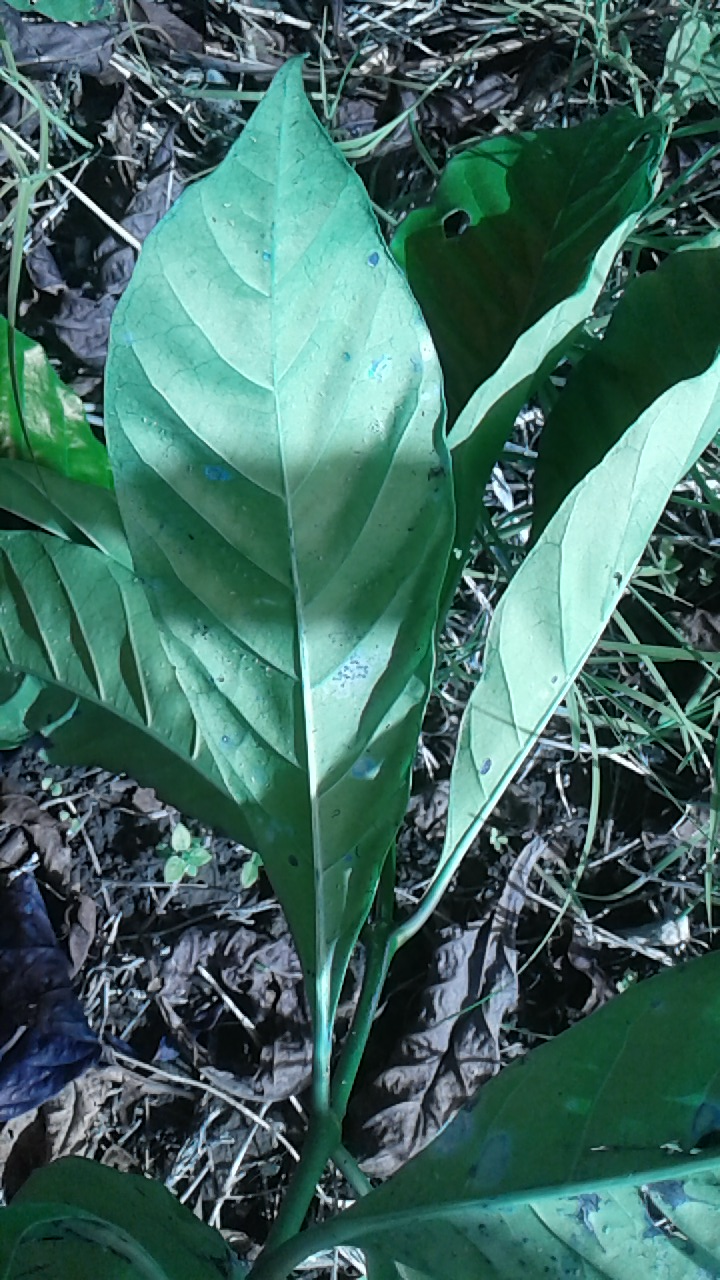

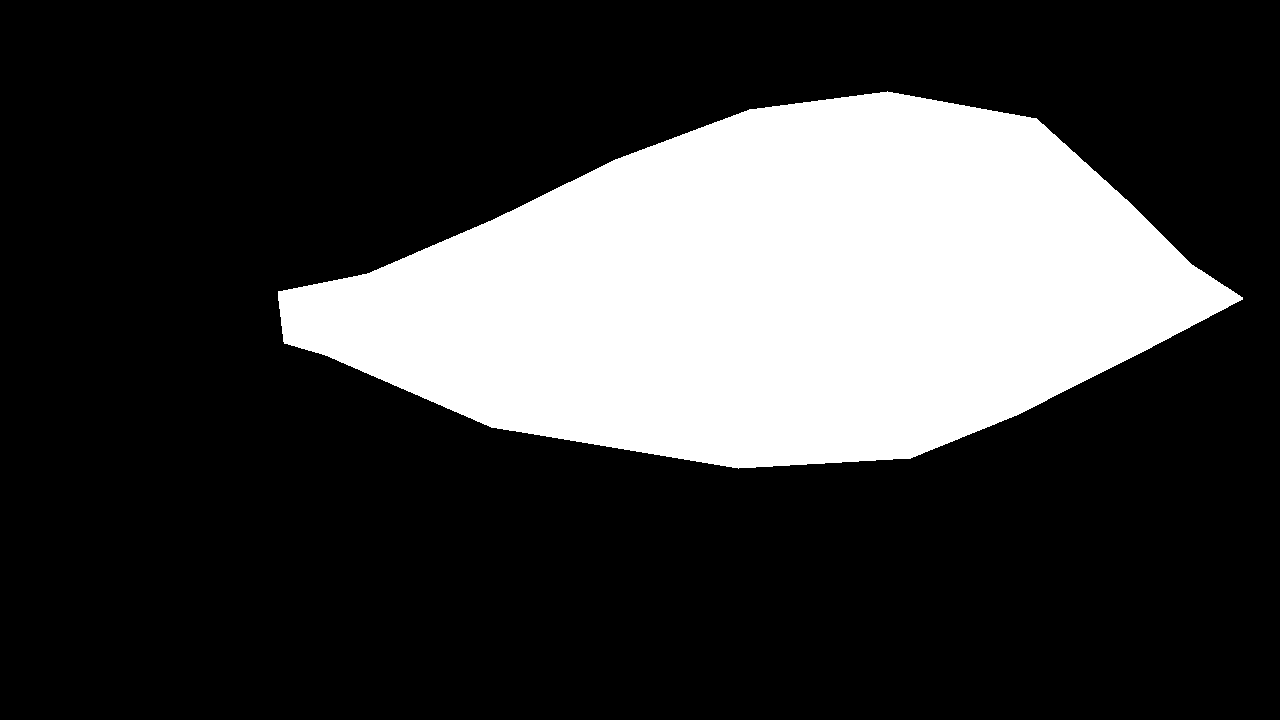

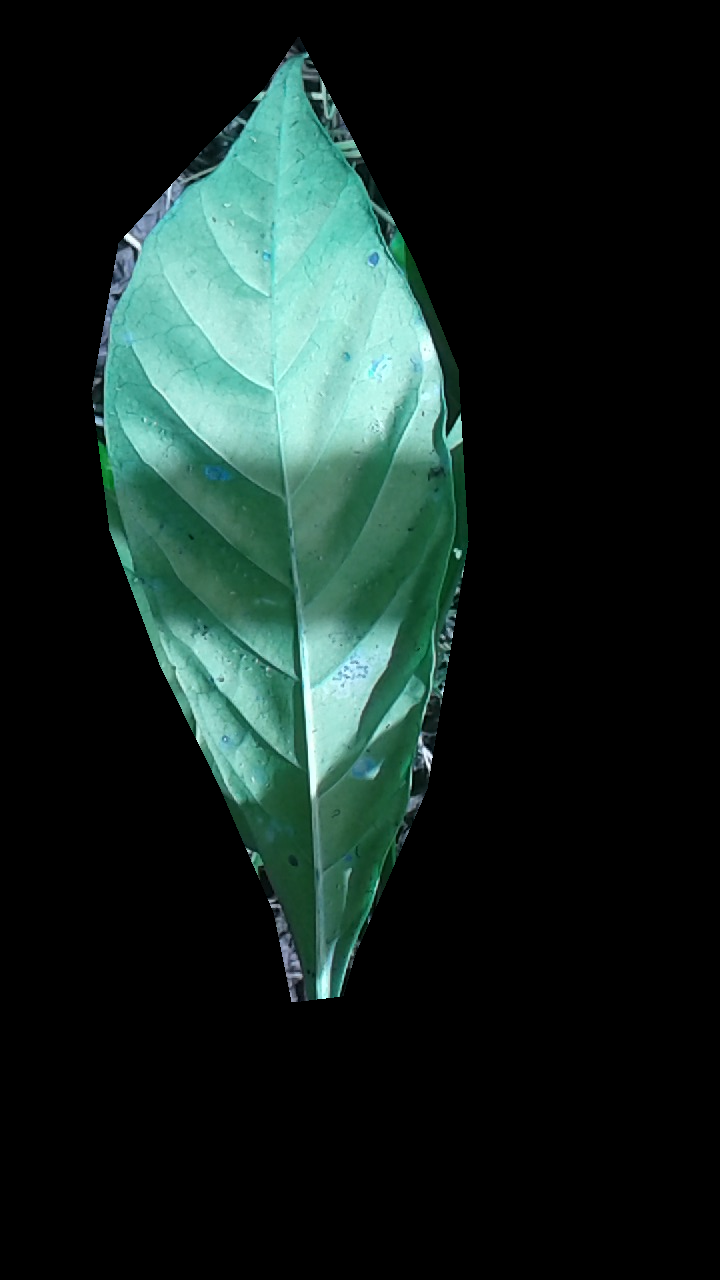

In [281]:
image_masked = mask_one_image(i, counterclockwise=True)

In [247]:
from sklearn.cluster import KMeans
X = image_masked.reshape(-1, 3)

In [258]:
kmeans = KMeans(n_clusters=6).fit(X)

In [259]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image_masked.shape)

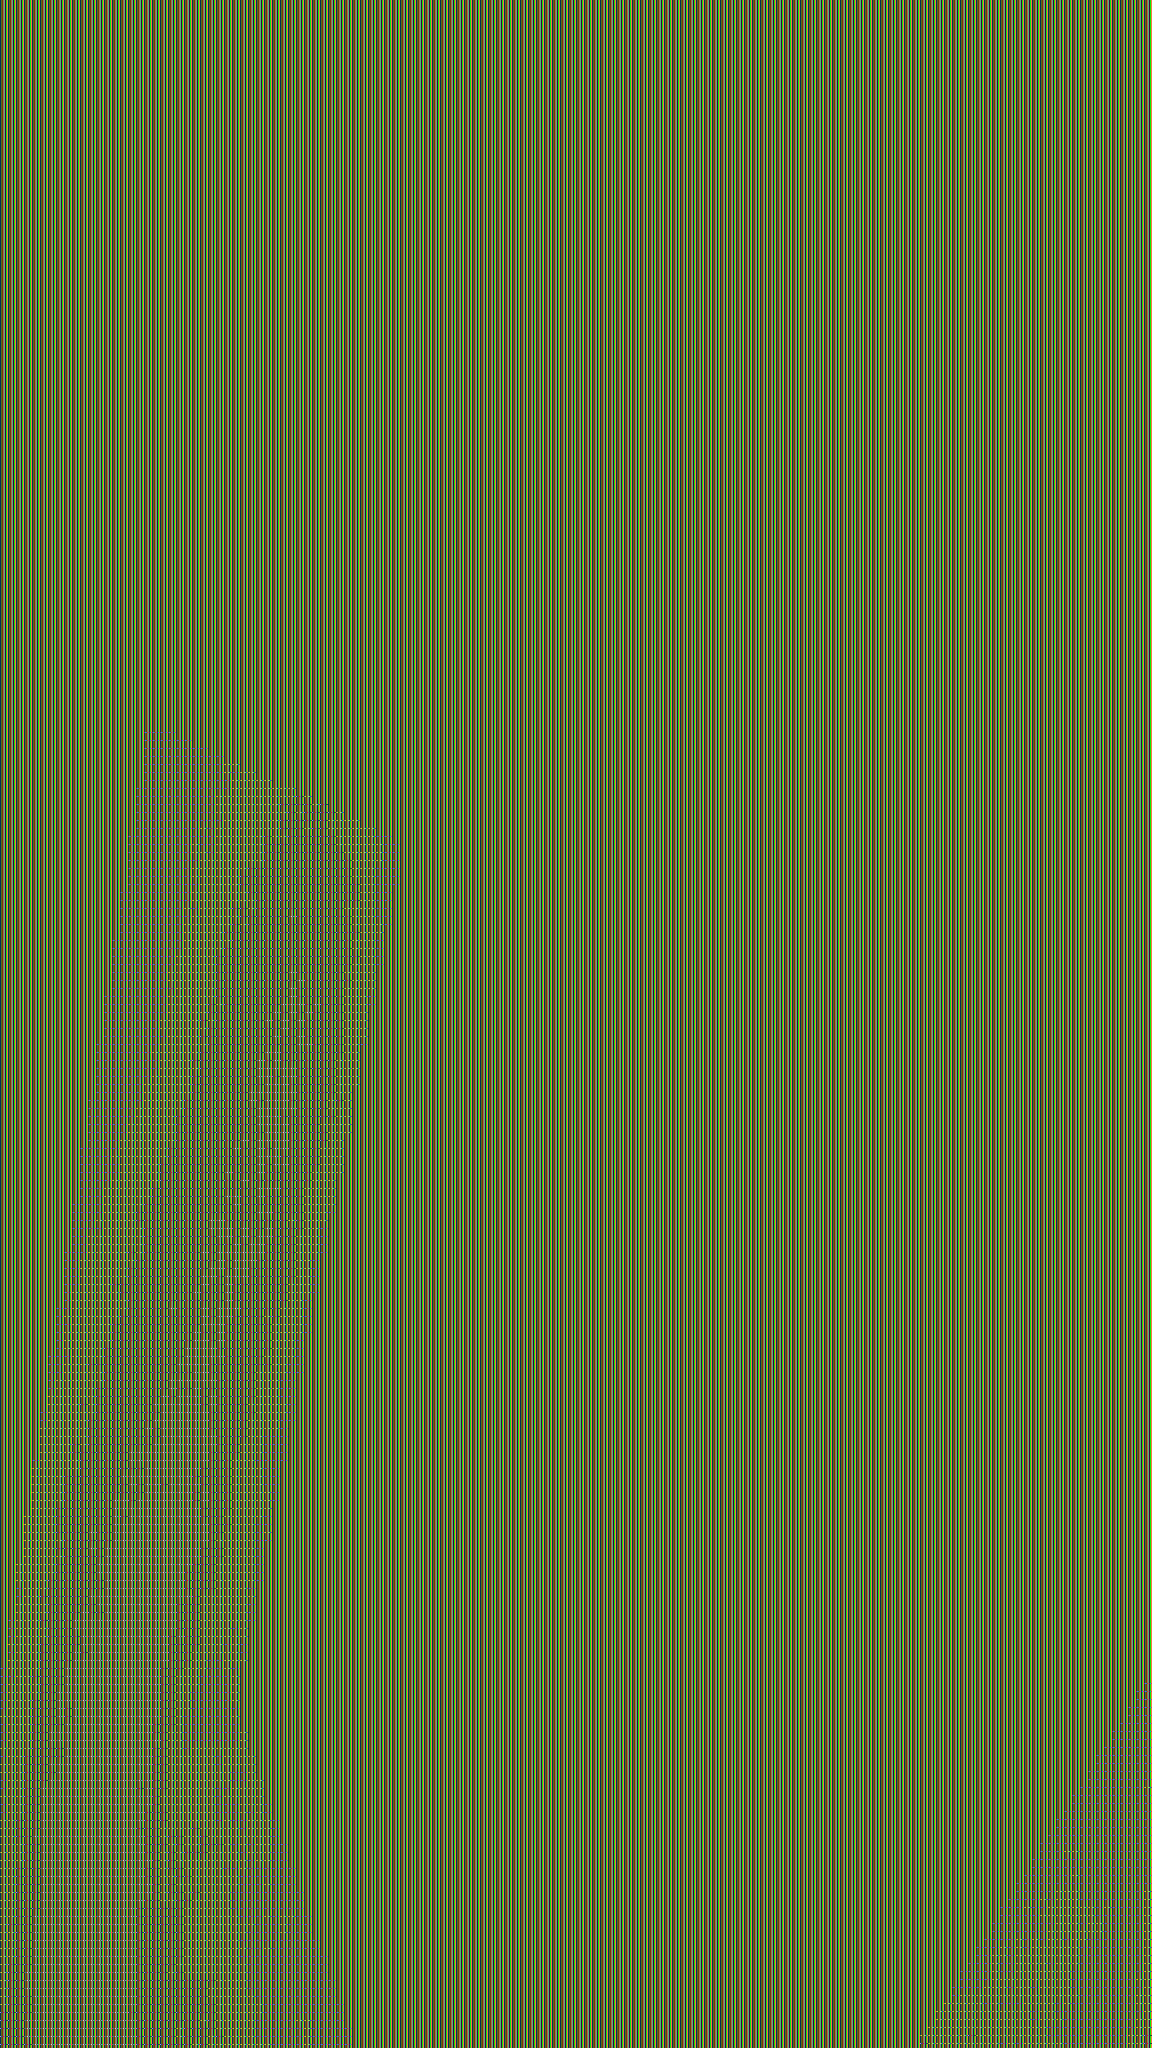

In [260]:
Image.fromarray(segmented_img, 'RGB')